In [1]:
import datetime
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

### 輸入候補ETF資料

In [2]:
start = datetime.datetime(2015, 4, 1)
end = datetime.date.today()

new_tickers = ['IDLV', 'XMLV', 'LGLV', 'SHV', 'VTIP', 'VCSH', 'SJNK', 'VGSH', 'SPYG', 'IYW', 'SOXX', 'IXN']

new_data = {}
for ticker in new_tickers:
    new_data[ticker] = pdr.get_data_yahoo(ticker, start, end)

new_p = DataFrame({tic: data['Adj Close'] for tic, data in new_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### 計算新增資料日報酬、標準差

In [3]:
new_ret = np.log(new_p / new_p.shift(1))
new_ret.head()

,IDLV,XMLV,LGLV,SHV,VTIP,VCSH,SJNK,VGSH,SPYG,IYW,SOXX,IXN
Date,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,0.002558,-0.000590,-0.004877,0.00000,0.002061,0.002295,0.000413,0.001146,-0.005186,-0.005350,-0.006509,-0.004139
2015-04-02,0.008586,0.006469,0.003389,-0.00009,0.000206,-0.000623,0.000344,-0.000655,0.004171,-0.001150,-0.002251,0.003002
2015-04-06,0.007257,0.005261,0.006341,0.00009,0.002467,0.000623,0.001374,0.001145,0.005569,0.010967,0.004390,0.010898
2015-04-07,0.000000,-0.009668,-0.002154,0.00000,-0.001233,0.000498,0.002400,-0.000654,-0.001415,-0.001709,0.000427,-0.002867


In [4]:
new_vol = new_ret.rolling(252).std() * np.sqrt(252)

### 繪製新增ETF標準差、報酬分佈

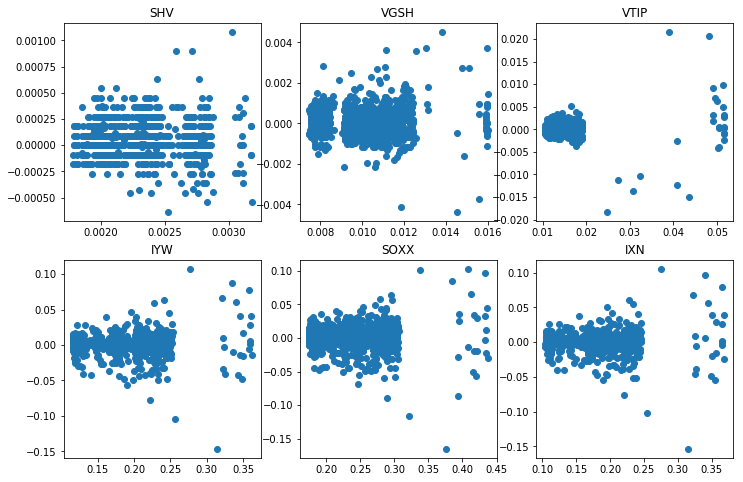

In [5]:
'IDLV', 'XMLV', 'LGLV', 'SHV', 'VTIP', 'VCSH', 'SJNK', 'VGSH', 'SPYG', 'IYW'
plt.figure(figsize = (12, 8))

plt.subplot(2, 3, 1) #nrow, ncol, index
plt.plot(new_vol['SHV'], new_ret['SHV'], 'o')
plt.title('SHV')

plt.subplot(2, 3, 2) #nrow, ncol, index
plt.plot(new_vol['VGSH'], new_ret['VGSH'], 'o')
plt.title('VGSH')

plt.subplot(2, 3, 3) #nrow, ncol, index
plt.plot(new_vol['VTIP'], new_ret['VTIP'], 'o')
plt.title('VTIP')

plt.subplot(2, 3, 4) #nrow, ncol, index
plt.plot(new_vol['IYW'], new_ret['IYW'], 'o')
plt.title('IYW')

plt.subplot(2, 3, 5) #nrow, ncol, index
plt.plot(new_vol['SOXX'], new_ret['SOXX'], 'o')
plt.title('SOXX')

plt.subplot(2, 3, 6) #nrow, ncol, index
plt.plot(new_vol['IXN'], new_ret['IXN'], 'o')
plt.title('IXN')

plt.show()

### 將新增ETF加入原本投資組合並計算其報酬及風險

In [6]:
start = datetime.datetime(2015, 4, 1)
end = datetime.date.today()
tickers = ['SCHX', 'FNDX', 'SCHA', 'FNDA', 'SCHF', 'FNDF', 'SCHC', 'FNDC', 'SCHE', 'FNDE', 'SCHR', 'VMBS', 'SCHP', 'BNDX', 'SHYG', 'EMLC', 'SCHH', 'VNQI', 'IAU']

all_data = {}
for ticker in tickers:
    all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)

price = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
price['IYW'] = new_p['IYW'] #要記得重跑前面的price（不然會累加上去）

price.head()

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU,IYW
Date,,,,,,,,,,,,,,,,,,,,
2015-03-31,44.870914,26.858606,53.483742,28.940458,26.504255,23.257940,26.512918,24.449413,21.360584,20.836224,49.515152,47.335659,50.619335,47.938328,37.233822,30.051247,35.317154,44.414474,11.45,99.838173
2015-04-01,44.671776,26.706411,53.437302,28.791235,26.662069,23.424070,26.618404,24.422428,21.685022,21.119106,49.704853,47.405716,50.969593,47.952518,37.246014,30.292789,35.221355,44.848595,11.65,99.305504
2015-04-02,44.843769,26.858606,53.604496,28.977760,26.890026,23.642658,26.917292,24.728268,21.991930,21.561115,49.622768,47.414589,50.849758,47.863811,37.246014,30.427837,35.526188,45.140636,11.62,99.191360
2015-04-06,45.115326,27.046616,53.864571,29.136316,27.170584,23.896225,27.304087,25.088083,22.272528,21.817480,49.723103,47.458961,50.969593,47.961384,37.291721,30.907961,35.909397,45.606331,11.76,100.285225
2015-04-07,45.015751,26.974993,53.567337,28.977760,27.153049,23.948683,27.181015,24.980141,22.211147,21.755598,49.695751,47.476700,51.117054,47.925911,37.314579,30.727909,35.282314,45.527401,11.70,100.114014


In [8]:
log_ret = np.log(price / price.shift(1))
log_ret.head()

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU,IYW
Date,,,,,,,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.004448,-0.005683,-0.000869,-0.005170,0.005937,0.007118,0.003971,-0.001104,0.015074,0.013485,0.003824,0.001479,0.006896,0.000296,0.000327,0.008006,-0.002716,0.009727,0.017316,-0.005350
2015-04-02,0.003843,0.005683,0.003124,0.006458,0.008514,0.009288,0.011166,0.012445,0.014054,0.020713,-0.001653,0.000187,-0.002354,-0.001852,0.000000,0.004448,0.008618,0.006491,-0.002578,-0.001150
2015-04-06,0.006037,0.006976,0.004840,0.005457,0.010379,0.010668,0.014267,0.014446,0.012678,0.011820,0.002020,0.000935,0.002354,0.002036,0.001226,0.015656,0.010729,0.010264,0.011976,0.010967
2015-04-07,-0.002210,-0.002652,-0.005533,-0.005457,-0.000646,0.002193,-0.004518,-0.004312,-0.002760,-0.002840,-0.000550,0.000374,0.002889,-0.000740,0.000613,-0.005842,-0.017617,-0.001732,-0.005115,-0.001709


In [9]:
log_ret.corr() 

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU,IYW
SCHX,1.000000,0.985726,0.933463,0.925697,0.896920,0.877879,0.869248,0.887104,0.815205,0.785076,-0.441189,0.034442,-0.109031,0.080283,0.777371,0.514673,0.748479,0.778183,-0.045103,0.931632
FNDX,0.985726,1.000000,0.933969,0.939168,0.896376,0.886353,0.871391,0.888289,0.806710,0.790552,-0.451821,0.030655,-0.109041,0.063360,0.786683,0.521731,0.746382,0.773738,-0.042028,0.883981
SCHA,0.933463,0.933969,1.000000,0.989261,0.861217,0.851365,0.853028,0.856893,0.774194,0.757539,-0.418729,0.061199,-0.054683,0.089645,0.775056,0.512381,0.742323,0.757480,-0.033305,0.843858
FNDA,0.925697,0.939168,0.989261,1.000000,0.862084,0.855144,0.855477,0.858747,0.771568,0.762456,-0.418779,0.068156,-0.051719,0.083596,0.776720,0.523230,0.753075,0.758736,-0.040051,0.818843
SCHF,0.896920,0.896376,0.861217,0.862084,1.000000,0.988818,0.964121,0.971966,0.885387,0.871993,-0.394144,0.064074,-0.025755,0.085692,0.755561,0.661182,0.670944,0.881997,0.023019,0.819330
FNDF,0.877879,0.886353,0.851365,0.855144,0.988818,1.000000,0.953391,0.960296,0.871405,0.867138,-0.411649,0.045021,-0.033123,0.057489,0.749336,0.660314,0.648496,0.866987,0.021812,0.793514
SCHC,0.869248,0.871391,0.853028,0.855477,0.964121,0.953391,1.000000,0.974208,0.868522,0.855746,-0.343341,0.097814,0.032247,0.124740,0.770502,0.691844,0.677253,0.887684,0.096758,0.792224
FNDC,0.887104,0.888289,0.856893,0.858747,0.971966,0.960296,0.974208,1.000000,0.868546,0.851854,-0.382682,0.061594,-0.019396,0.110664,0.758980,0.656740,0.677337,0.874366,0.054809,0.811060
SCHE,0.815205,0.806710,0.774194,0.771568,0.885387,0.871405,0.868522,0.868546,1.000000,0.963042,-0.336935,0.038688,-0.004221,0.093584,0.664664,0.716381,0.580252,0.852516,0.061642,0.779682
FNDE,0.785076,0.790552,0.757539,0.762456,0.871993,0.867138,0.855746,0.851854,0.963042,1.000000,-0.330333,0.049431,0.023077,0.083517,0.656675,0.741141,0.560568,0.823883,0.083151,0.730121


In [10]:
weights = np.random.random(len(price.columns))
weights /= np.sum(weights)

In [11]:
def statistics(weights):
    weights = np.array(weights)
    port_ret = np.sum(log_ret.mean()*weights) * 252
    port_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    
    return np.array([port_ret, port_vol, port_ret/port_vol])

def min_var(weights):
    return statistics(weights)[1]

In [12]:
noa = len(price.columns)
bnds = tuple((0,1) for x in range(noa))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

opt_vol = sco.minimize(min_var, noa* [1./noa,], method= 'SLSQP', bounds = bnds, constraints = cons)

In [13]:
target_returns = np.linspace(0.0, 0.125, 50)
target_vol = []

cnt = 0
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    ret = sco.minimize(min_var, noa*[1./noa,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_vol.append(ret['fun'])
    cnt += 1
    print(cnt)
target_vol = np.array(target_vol)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


### 匯入原本投資組合資料（以利後面效率前緣改善的比較）

In [14]:
import import_ipynb

importing Jupyter notebook from EF_final.ipynb
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of

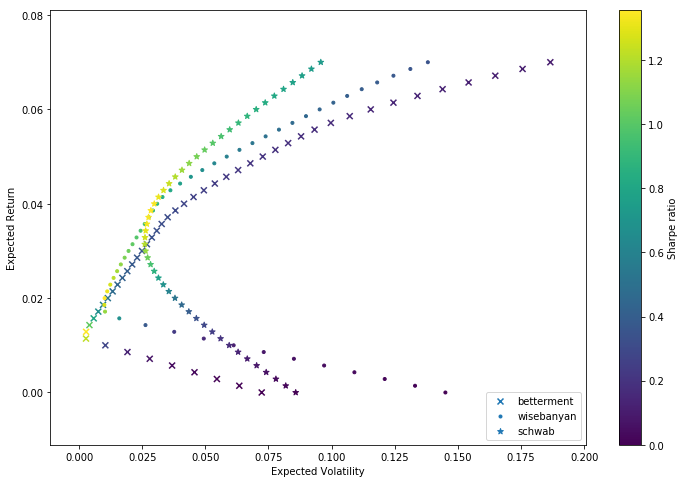

In [15]:
from EF_final import *

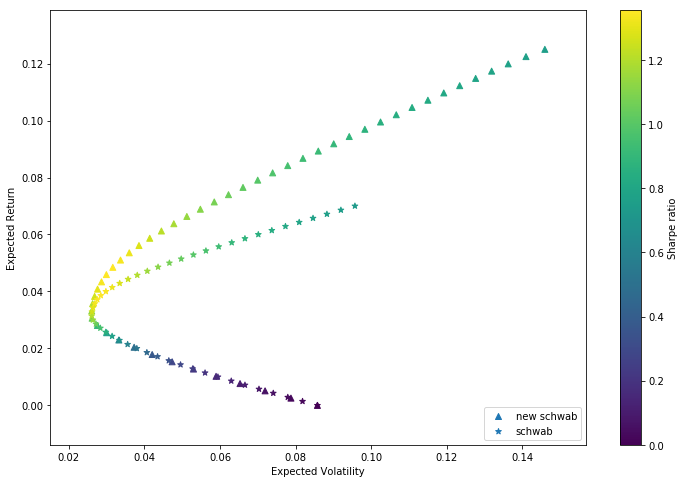

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(target_vol,target_returns, c = target_returns/target_vol, marker = '^', label = 'new schwab')
plt.scatter(target_vol_sch,target_returns_sch, c = target_returns_sch/target_vol_sch, marker = '*', label = 'schwab')


#plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe ratio')
plt.legend(loc = 'lower right')


